In [19]:
import random
import numpy as np
#from bidder import Bidder
from matplotlib import pyplot as plt

'''
A User class that includes:
an initializer method with the definition def init(self) .
a private __probability attribute to represent the probability of clicking on an ad. 
When a user is created, the secret probability is drawn from a uniform distribution from 0 to 1.
(Please use the random or numpy.random modules)
a show_ad method with the definition def show_ad(self) that represents showing an ad to this User . 
This method should return True to represent the user clicking on and ad and False otherwise.
'''

class User:
    class_counter= 0
    def __init__(self):
        User.class_counter += 1
        self.id = User.class_counter
        self.propability = np.random.uniform()

    def __repr__(self):
        rep = 'User(' + self.propability +')'

    def __str__(self):
        return self.__repr__()

    def show_ad(self):
        return self.propability >= 0.5


'''
an initializer with the definition def init(self, users, bidders) . 
Here, users is expected to contain a list of all User objects. 
bidders is expected to contain a list of all Bidder objects.
an execute_round method with the header def execute_round(self) . 
This method should execute all steps within a single round of the game.
a balances attribute, which contains a dictionary of the current balance of every Bidder .
(optional) a plot_history method with the definition def plot_history(self) , 
which creates a visual representation of how the auction has proceeded. 
It is up to you do decide what the graphic looks like, and this method
 is meant to help you assess how your algorithm is performing. matplotlib is covered in Module 12.
'''

class Auction:

    def __init__(self, users, bidders):
        self.users = users
        self.bidders = bidders

        # dictionary of balance for each bidder
        self.balance = {}
        for bidder in bidders:
            self.balance[bidder] = bidder.balance

        # keep track of all rounds' winning prices
        self.history = []

    def __repr__(self):
        return f'Auction(Users:{self.users},Bidders:{self.bidders},Bidders Balance:{self.balance})'

    def __str__(self):
        return self.__repr__()

    def plot_history(self):
        plt.plot(self.history)
        plt.show()

    def execute_round(self):
        # dictionary to keep bidder, selected user and bid
        bids = {}

        # for each bidder
        for bidder in self.bidders:

            # get user for this bidder as long as the user has not already been selected
            while True:
                # get user by random selection => random choice function for lists
                selected_user = random.choice(self.users)
                # keep his/her user id
                user_id = selected_user.id
                # check if he/she has already been selected
                if not user_id in bids:
                    break
            # notify bidder and get his/her bid for this user
            money = bidder.bid(user_id)
            # update dictionary
            bids[(bidder,selected_user)] = money

        cnt = 0
        # sort dictionary so to get the two highest bids
        for key, value in sorted(bids.items(), key=lambda item: item[1], reverse=True):
            cnt+=1
            # the highest bid gives the winner
            if cnt == 1:
                winner = key[0]
                connected_user = key[1]
            # while the seconds highest considered to be the winning price
            elif cnt == 2:
                winning_price = value
                break

        # notification process
        cnt = 0
        for key, value in sorted(bids.items(), key=lambda item: item[1], reverse=True):
            cnt += 1
            if cnt == 1:
                winner.notify(True,winning_price,connected_user.show_ad())
            else:
                key[0].notify(False,winning_price,key[1].show_ad())

        # condition to remove the winner
        if winner.balance < -1000:
            self.bidders.remove(winner)

        # update the dictionary of balances after this round
        self.balance = {}
        for bidder in self.bidders:
            self.balance[bidder] = bidder.balance

        # log the winning price for the needs of history tracking
        self.history.append(winning_price)




class Bidder:
    

    # BIDDER CREATION -------------- initiated by GAME runner / Developer ------------------------
    
    def __init__(self, num_users, num_rounds):

        self.num_users = num_users
        self.num_rounds = num_rounds
        self.bidding_round = 0

        self.bid_y_n = True
        self.bid_participate = {i: 0 for i in range(num_users)} #whether bidder bids or not (USER: BID COUNT)
        self.bid_wins = {i: 0 for i in range(num_users)} # if bidder wins
        #print('bid wins', self.bid_wins)
        self.bid_win_user_clicks = {i: 0 for i in range(num_users)} # if user clicks
        
        self.default_bid_price = random.uniform(0, 1)
#        print('default bid price', self.default_bid_price,'\n','-'*100)
        
        #Transaction records
        self.bid_participate_history = [] # maintains bidderid, userid, bidding round, bid price
        self.bid_win_history = []
        self.bid_win_user_click_history = []
        self.balance  = 0
        
        
    # SUBMIT BID  ------------ initiated by auction ------------------------------------
    
    def bid(self, user_id):
        if  self.bid_y_n:
            self.bidding_round += 1
            #self.bid_participate = 0
            self.user_id = user_id
            bid_price = self.default_bid_price + (self.bidding_round)*0.1
    #        print('final bid price', bid_price,'\n','-'*100)
            self.bid_participate[self.user_id] = (self.bid_participate).get(self.user_id, 0)+1
            self.bid_participate_history.append([id(self), self.user_id, self.bidding_round, bid_price])
            #print('bid price', bid_price)
            print('bid participation:format UserNumber:BidCount', self.bid_participate, '\n','-'*100)
    #        print('bid participation history', self.bid_participate_history, '\n','-'*100)
            return bid_price
    
    # NOTIFIED OF BID OUTCOME ------------ initiated by auction ------------------------------------
    
    def notify(self, auction_winner, price, clicked):
        bid_y_n_won = 0
        #print('auction winner is')
        if auction_winner:
            #self.bid_participate_history.append([self.user_id, bid_y_n_won+1])
            self.bid_win_history.append([self.user_id, bid_y_n_won+1])
            self.bid_wins[self.user_id] = (self.bid_wins).get(self.user_id, 0)+1
#            print('bid wins is:', self.bid_wins)
#            self.bid_wins[self.user_id] += 1
            # self.bid_wins[user_id] += 1
            
            
            if clicked:
#                self.bid_win_user_clicks[self.user_id] += 1
                self.bid_win_user_clicks[self.user_id] = (self.bid_win_user_clicks).get(self.user_id, 0)+1
                self.bid_win_user_click_history.append([self.user_id, self.bidding_round])
    
                # print('user clicks', self.bid_win_user_clicks)
                # print(
                #     f"Smart {id(self)} won round; User {self.user_id}"
                #     f" clicked"
                # )
        else:
            pass

#        print(self.bid_win_history)
#        print(self.bid_wins)
#        print(self.bid_participate_history)
        
#        print(self.bid_win_user_clicks)
#        print(self.bid_wins)


In [20]:
b0,b1,b2 = Bidder(1,10),Bidder(1,10),Bidder(1,10)
auction = Auction([User()],[b0,b1,b2])
auction.execute_round()

bid participation:format UserNumber:BidCount {0: 0, 1: 1} 
 ----------------------------------------------------------------------------------------------------
bid participation:format UserNumber:BidCount {0: 0, 1: 1} 
 ----------------------------------------------------------------------------------------------------
bid participation:format UserNumber:BidCount {0: 0, 1: 1} 
 ----------------------------------------------------------------------------------------------------


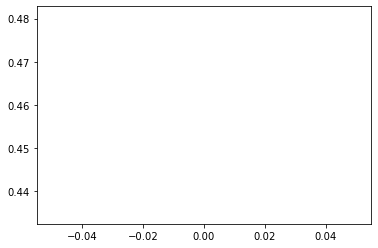

In [12]:
auction.plot_history()